In [5]:

#假设检验
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
#样本数据集 H0：平均值u<18.5；H1：平均值u>=18.5
dataSer=pd.Series([27.96,22.90,8.30,49.78,24.88,14.55,26.22,28.21,34.71,12.99,21.89,9.86,20.26,23.36,                  36.02,22.94,12.10,22.43,22.13,16.48,33.75,26.05,12.21,24.49,14.87,14.87,27.84,37.10])
#计算样本均值、样本标准差
sample_mean=dataSer.mean()
sample_std=dataSer.std()

In [6]:
sample_mean

23.183928571428577

In [7]:
sample_std

9.463555959686422

/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'data_distribution')

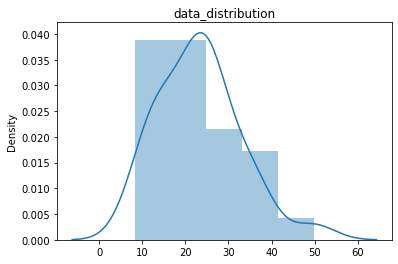

In [4]:

#通过直方图查看数据分布，还可做出拟合曲线
sns.distplot(dataSer)
plt.title('data_distribution')

In [8]:
n=28
SE=sample_std/(np.sqrt(n))
#②计算t值
pop_mean=18.5
t=(sample_mean-pop_mean)/SE
print('标准误差为%.2f'%SE) #.2f 保留两位小数
print('t=%.3f'%t)

标准误差为1.79
t=2.619


In [15]:

t,p_twotail=stats.ttest_1samp(dataSer,pop_mean)
p_onetail=p_twotail/2
print('假设检验t值为%.3f，相应的概率p值为%.4f'%(t,p_onetail))

假设检验t值为2.619，相应的概率p值为0.0071


In [ ]:
输入：样本数据以及总体均值；输出：t值以及概率p值

①单(lsamp)样本t检验(ttest_lsamp)

②相关(related)配对t检验(ttest_rel)

③双独立(independent)样本t检验(ttest_ind)

做出结论：

左尾判断条件：t<0,且概率p值<显著性水平

右尾判断条件：t>0,且概率p值<显著性水平

In [17]:
'''95%置信区间，右尾查表t=1.703（查0.05）'''
alpha=0.05
if (t>0 and p_onetail<alpha):
    print('拒绝原假设，有统计显著，平均值u>18.5')
else:
    print('接受原假设，无统计显著，平均值u<=18.5')


拒绝原假设，有统计显著，平均值u>18.5


In [18]:
#计算置信区间：
'''按照df=27,置信水平为95%查表得t值（此处应为双尾，查0.025）'''
t_ci=2.052
SE=stats.sem(dataSer)  #scipy计算标准误差
#置信区间上下限
a=sample_mean-t_ci*SE
b=sample_mean+t_ci*SE
print('单个平均值的置信区间，95置信水平CI=[%.3f,%.3f]'%(a,b))

单个平均值的置信区间，95置信水平CI=[19.514,26.854]


In [ ]:
一元线性回归

In [20]:
#导入cv模块
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_excel('/Users//stanley//Desktop//线性回归案例.xlsx',header=0,index_col=0)
data.head()


,age,height,weight
序号,,,
1,21,163,60
2,22,164,56
3,21,165,60
4,23,168,55
5,21,169,60


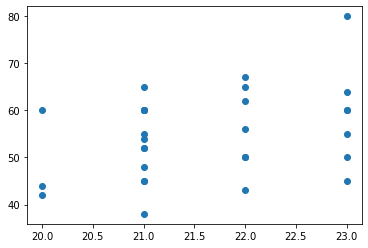

In [21]:

plt.scatter(data['age'].values,data['weight'].values)  #体重与年龄的散点图
plt.show()

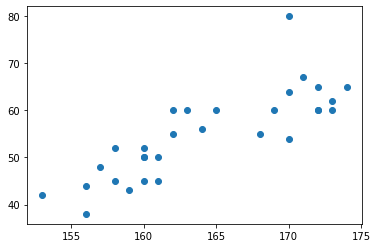

In [22]:

plt.scatter(data['height'].values,data['weight'].values)  #体重与身高的散点图
plt.show()

In [23]:
print(data.cov())     #协方差矩阵
print(data.corr())    #相关系数矩阵

             age     height     weight
age     0.937931   2.537931   2.993103
height  2.537931  39.182759  46.789655
weight  2.993103  46.789655  84.162069
             age    height    weight
age     1.000000  0.418646  0.336882
height  0.418646  1.000000  0.814787
weight  0.336882  0.814787  1.000000


In [24]:
#载入OLS回归库
import statsmodels.api as sm 
model1 = sm.OLS(data['weight'], sm.add_constant(data['height'])) #身高的散点图及相关系数与体重较高，故选择二者进行回归验证
result = model1.fit()
result.summary()  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     55.30
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.24e-08
Time:                        16:21:22   Log-Likelihood:                -92.197
No. Observations:                  30   AIC:                             188.4
Df Residuals:                      28   BIC:                             191.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -141.2970     26.401     -5.352      0.0

In [ ]:
解释分析：

拟合的方程结果为 体重=-141.2970+1.1941×身高

R方=0.664 拟合程度一般，并不是特别好；

P值均为0<0.5，说明均拒绝原假设，即截距项和斜率均不为0；

截距项的置信区间【-195.377，-87.217】，斜率的置信区间【0.865，1.523】

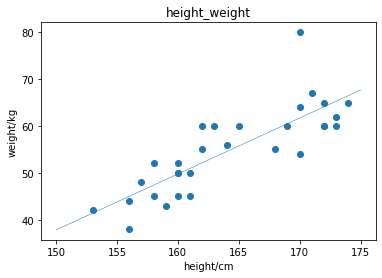

In [29]:
#绘制线性回归图
from matplotlib.font_manager import FontProperties
#font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
plt.scatter(data['height'], data['weight'])
plt.plot([150,175], [150*1.1941-141.2970,175*1.1941-141.2970],linewidth=0.5)
plt.xlabel('height/cm')
plt.ylabel("weight/kg")
plt.title('height_weight')#身高与体重的线性回归图
plt.show()

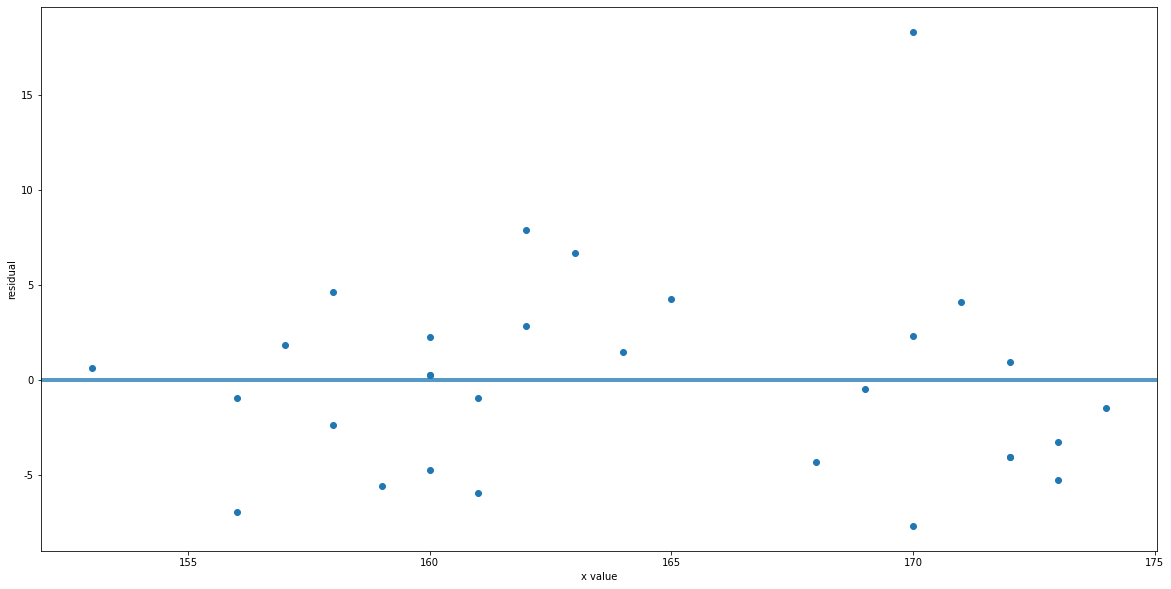

In [30]:
#残差图
plt.figure(figsize = (20,10))
plt.scatter(data.height,result.resid)
plt.axhline(0.05)
plt.axhline(-0.05)
plt.xlabel('x value')
plt.ylabel('residual')
plt.show()

In [ ]:
多元回归

In [31]:
#导入cv模块
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_excel('/Users//stanley//Desktop//线性回归案例.xlsx',header=0,index_col=0)
data.head()

,age,height,weight
序号,,,
1,21,163,60
2,22,164,56
3,21,165,60
4,23,168,55
5,21,169,60


In [33]:
#多元线性回归
import statsmodels.api as sm 
model3 = sm.OLS(data['weight'],sm.add_constant(data[['age','height']]))
result = model3.fit()
result.summary()  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     26.67
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.05e-07
Time:                        17:09:26   Log-Likelihood:                -92.196
No. Observations:                  30   AIC:                             190.4
Df Residuals:                      27   BIC:                             194.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -140.7652     29.756     -4.731      0.0

In [ ]:
分析:经过调整的R方=0.639，拟合系数一般，并不是特别好。

F统计量=26.67（检验解释变量系数是否全为0？），P-value=4.05*10-7，非常小，拒绝原假设；

常数项估计-140.762，P值很小，说明截距项显著，不为0；

age项估计-0.0485，P值较大>0.05，说明age项不显著，可以尝试剔除该解释变量；

height项1.1973，P值很小，说明height项显著，不为0。

In [35]:
y=data.weight
X1=data[['age','height']]
from sklearn.linear_model import LinearRegression #载入机器学习中线性回归包
lm = LinearRegression()
from sklearn.model_selection import cross_val_score #载入机器学习中交叉检验包
scores1 = cross_val_score(lm, X1, y, cv=10)  #cv=10，数据分成10等均匀份
print (scores1)

[-6.4510094  -3.9944243  -2.7855848  -1.93708176 -5.17523362 -2.83390749
 -0.44603579 -1.64991465 -1.34965816 -0.01881016]
